In [1]:
using Pkg
Pkg.add("TickTock")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
using DelimitedFiles
using Random
using DataFrames
using Statistics
using CSV
using TickTock
using Plots

    Updating registry at `/opt/julia/registries/General.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.7/Project.toml`
  No Changes to `/opt/julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.7/Project.toml`
  No Changes to `/opt/julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.7/Project.toml`
  No Changes to `/opt/julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.7/Project.toml`
  No Changes to `/opt/julia/environments/v1.7/Manifest.toml`


In [2]:
function get_custo(instancia)
    tamanho = size(instancia)
    matrix_custo = zeros(Int, tamanho)
    for linha in 2:tamanho[1]
        for coluna in 2:tamanho[2]
            matrix_custo[linha, coluna] = instancia[linha, coluna] + max(matrix_custo[linha-1, coluna], matrix_custo[linha, coluna-1])
        end
    end
    return matrix_custo[tamanho[1], tamanho[2]]
end

get_custo (generic function with 1 method)

In [3]:
function get_vizinho_one_shift(instancia)
    quantidade_linhas = size(instancia)[1]
    vizinho = copy(instancia)
    origem = rand(1:quantidade_linhas)
    destino = rand(1:quantidade_linhas)
    vizinho[origem, :], instancia[destino, :] = instancia[destino, :], instancia[origem, :]
    return vizinho
end

get_vizinho_one_shift (generic function with 1 method)

In [4]:
instancias = []
prefixo = "pfssp/data/fs/"
for index in 1:69
    
    nome = "ta" * string(index, pad=3) 
    instancia = readdlm(prefixo*nome, Int, skipstart=1)
    instancia = instancia[:, setdiff(1:end, [column 
                                        for column in 1:size(instancia)[2] if (column % 2) == 1])]
    push!(instancias, (nome, instancia))
end

### Questão 3-a

In [5]:
function get_melhor_vizinho(is_first_improved, custo, solucao)
    menor_custo = custo
    melhor_vizinho = copy(solucao)
    for _ in 1:20
        vizinho = get_vizinho_one_shift(solucao)
        custo = get_custo(vizinho)
        if custo < menor_custo
            menor_custo = custo
            melhor_vizinho = vizinho
            if is_first_improved
                break
            end
        end
    end
    return melhor_vizinho, menor_custo
end

get_melhor_vizinho (generic function with 1 method)

In [6]:
resultados = []
for (nome, instancia) in instancias
    for is_first_improved in [true, false]
        if is_first_improved
            alg = "FI"
        else
            alg = "BI"
        end
        tick()
        solucao = instancia
        menor_custo = get_custo(instancia)
        for iteracao in 1:100
            tick()
            solucao, menor_custo = get_melhor_vizinho(is_first_improved, menor_custo, solucao)
            tempo = tok()
            push!(resultados, tuple(alg, nome, iteracao, round(tempo, digits=6), "NA", menor_custo))
        end
    end
end

┌ Info:  started timer at: 2022-03-02T19:12:38.962
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.196
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.305
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.306
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.306
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.306
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.306
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.306
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.306
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.313
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.313
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.313
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.313
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.313
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.313
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.313
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.313
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.314
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.322
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.322
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.322
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.323
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.323
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.323
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.323
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.323
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.323
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.331
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.331
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.331
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.331
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.331
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.331
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.332
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.332
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.332
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.341
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.341
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.341
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.341
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.341
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.341
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.341
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.341
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.341
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.349
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.349
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.349
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.350
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.350
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.350
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.350
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.350
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.350
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.359
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.368
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.368
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.368
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.368
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.369
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.369
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.369
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.369
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.369
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.377
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.377
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.378
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.378
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.378
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.378
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.378
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.378
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.378
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.387
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.387
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.387
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.387
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.388
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.388
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.388
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.388
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.388
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.396
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.396
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.396
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.396
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.397
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.397
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.397
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.397
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.397
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.406
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.406
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.406
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.406
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.406
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.407
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.407
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.407
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.407
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.416
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.416
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.416
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.416
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.416
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.416
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.416
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.417
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.417
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.426
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.426
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.426
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.426
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.426
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.426
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.426
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.426
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.427
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.436
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.436
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.437
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.437
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.437
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.437
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.437
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.437
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.437
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.446
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.446
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.446
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.446
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.446
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.447
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.447
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.447
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.447
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.456
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.456
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.456
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.456
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.457
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.457
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.457
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.457
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.457
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.465
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.466
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.466
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.466
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.466
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.466
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.466
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.466
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.466
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.476
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.476
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.476
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.476
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.476
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.476
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.476
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.476
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.476
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.486
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.486
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.486
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.486
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.486
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.486
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.486
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.487
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.487
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.554
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.554
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.554
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.554
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.555
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.555
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.555
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.555
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.555
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.565
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.565
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.566
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.566
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.566
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.566
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.566
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.566
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.566
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.577
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.577
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.577
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.577
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.577
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.577
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.578
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.578
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.578
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.588
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.588
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.588
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.588
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.588
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.589
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.589
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.589
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.589
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.599
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.599
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.600
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.600
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.600
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.600
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.600
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.600
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.600
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.611
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.611
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.611
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.611
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.612
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.612
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.612
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.612
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.612
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.630
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.631
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.631
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.631
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.631
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.631
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.631
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.631
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.631
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.645
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.645
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.645
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.645
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.645
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.646
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.646
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.646
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.646
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.658
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.659
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.659
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.659
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.659
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.659
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.659
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.659
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.659
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.670
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.670
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.670
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.671
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.671
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.671
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.671
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.671
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.671
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.682
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.682
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.682
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.683
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.683
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.683
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.683
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.683
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.683
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.697
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.697
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.697
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.697
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.697
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.697
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.697
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.697
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.698
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.709
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.709
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.709
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.709
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.709
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.709
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.710
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.710
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.710
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.722
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.722
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.722
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.723
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.723
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.723
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.723
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.723
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.723
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.778
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.778
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.778
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.778
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.779
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.779
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.779
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.779
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.779
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.790
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.790
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.791
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.791
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.791
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.791
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.791
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.791
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.791
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.803
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.803
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.803
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.803
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.804
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.804
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.804
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.804
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.804
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.814
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.814
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.814
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.814
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.815
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.815
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.815
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.815
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.815
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.826
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.827
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.827
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.827
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.827
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.827
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.827
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.827
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.827
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.838
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.838
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.838
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.839
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.839
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.839
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.839
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.839
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.839
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.850
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.850
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.850
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.850
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.851
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.851
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.851
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.851
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.851
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.862
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.862
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.862
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.862
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.862
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.862
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.862
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.862
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.862
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.874
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.874
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.874
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.874
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.875
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.875
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.875
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.875
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.875
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.887
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.888
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.888
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.888
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.888
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.888
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.888
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.888
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.888
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.898
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.898
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.898
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.899
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.899
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.899
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.899
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.899
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.899
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.911
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.913
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.965
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.965
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.965
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.966
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.966
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.966
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.966
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.966
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.966
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.977
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.979
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:39.990
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.991
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.991
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.991
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.991
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.991
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.991
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.991
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:39.992
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:40.002
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.002
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.003
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.003
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.003
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.003
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.003
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.003
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.004
└ @ T

┌ Info:  started timer at: 2022-03-02T19:12:40.019
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.019
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.019
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.019
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.019
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.020
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.020
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.020
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.020
└ @ T

Excessive output truncated after 524336 bytes.┌ Info:  started timer at: 2022-03-02T19:12:40.035
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.035
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.035
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.036
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.036
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.036
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.036
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:12:40.036
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  s

In [7]:
df_a = DataFrame(NamedTuple{(:alg, :instance, :rep, :time, :iterations, :value)}.(resultados));

In [8]:
CSV.write("resultados_tarefa3a.csv", df_a)

"resultados_tarefa3a.csv"

In [9]:
stats_a = combine(groupby(df_a, ["alg", "instance"]), [:time => sum  :value => minimum]);

#### Média e desvio padrão de tempo e custo em função da estratégia de busca local

In [10]:
combine(groupby(stats_a, "alg"), [:time_sum => mean, 
                                  :time_sum => std, 
                                  :value_minimum => mean,
                                  :value_minimum => std])

,alg,time_sum_mean,time_sum_std,value_minimum_mean,value_minimum_std
,String,Float64,Float64,Float64,Float64
1,FI,0.0137305,0.0135597,2070.99,989.279
2,BI,0.0173641,0.0108443,1937.17,913.141


#### Histogramas

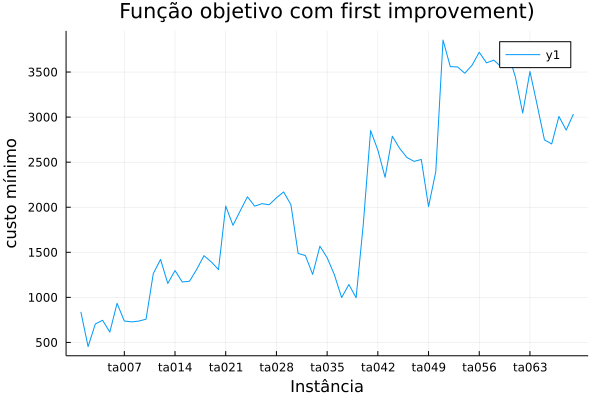

In [11]:
first_improved = stats_a[stats_a[!, "alg"] .== "FI", :];
plot(first_improved.instance, first_improved.value_minimum, 
    title="Função objetivo com first improvement)",
    xlabel = "Instância", ylabel="custo mínimo")

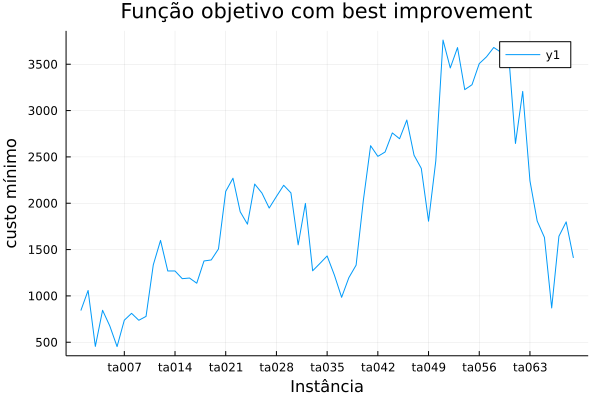

In [12]:
best_improved = stats_a[stats_a[!, "alg"] .== "BI", :];
plot(best_improved.instance, best_improved.value_minimum,
            title="Função objetivo com best improvement",
            xlabel = "Instância", ylabel="custo mínimo")

### Questão 3-b

In [13]:
function get_melhor_vizinho_busca_aleatoria(custo, solucao, probabilidade)
    menor_custo = custo
    melhor_solucao = copy(solucao)
    for _ in 1:20
        vizinho = get_vizinho_one_shift(solucao)
        custo = get_custo(vizinho)
        if custo < menor_custo
            menor_custo = custo
            melhor_solucao = vizinho
            if rand() < probabilidade
                break
            end
        end
    end
    return melhor_solucao, menor_custo
end

get_melhor_vizinho_busca_aleatoria (generic function with 1 method)

In [14]:
resultados = []
for (nome, instancia) in instancias
    for probabilidade in [0.0, 0.05, 0.25, 0.5, 0.75, 1.0]
        solucao = instancia
        menor_custo = get_custo(instancia)
        for iteracao in 1:15
            tick();
            solucao, menor_custo = get_melhor_vizinho_busca_aleatoria(menor_custo, 
                                                                        solucao, 
                                                                        probabilidade)
            tempo = tok();
            push!(resultados, tuple(probabilidade, nome, iteracao, round(tempo, digits=6), "NA", menor_custo))
        end
    end
end

┌ Info:  started timer at: 2022-03-02T19:13:11.765
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.782
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.783
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.783
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.783
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.783
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.783
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.783
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.783
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.790
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.790
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.790
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.791
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.791
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.791
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.791
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.791
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.791
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.799
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.799
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.799
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.799
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.799
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.799
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.800
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.800
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.800
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.808
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.808
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.808
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.808
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.808
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.808
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.808
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.808
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.809
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.816
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.816
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.816
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.816
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.816
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.816
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.816
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.816
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.817
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.824
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.824
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.824
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.824
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.824
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.824
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.824
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.825
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.825
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.832
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.832
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.832
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.832
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.833
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.833
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.833
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.833
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.833
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.840
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.840
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.840
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.840
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.840
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.841
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.841
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.841
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.841
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.878
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.878
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.878
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.878
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.878
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.878
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.878
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.878
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.878
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.885
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.886
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.886
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.886
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.886
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.886
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.886
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.886
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.886
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.894
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.894
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.894
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.894
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.894
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.894
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.895
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.895
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.895
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.903
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.903
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.903
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.903
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.903
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.903
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.903
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.904
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.904
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.913
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.913
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.913
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.913
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.913
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.913
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.913
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.913
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.914
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.921
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.921
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.922
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.922
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.922
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.922
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.922
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.922
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.922
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.929
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.929
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.929
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.929
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.930
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.930
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.930
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.930
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.930
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.937
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.937
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.937
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.937
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.938
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.938
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.938
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.938
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.938
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.945
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.945
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.945
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.945
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.945
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.946
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.946
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.946
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.946
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.953
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.953
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.953
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.953
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.953
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.953
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.954
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.954
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.954
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.961
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.961
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.962
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.962
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.962
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.962
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.962
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.962
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.962
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.969
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.969
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.970
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.970
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.970
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.970
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.970
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.970
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.970
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.977
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.978
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.986
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.986
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.986
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.986
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.986
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.986
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.986
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.987
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.987
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:11.994
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.994
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.994
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.994
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.995
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.995
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.995
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.995
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:11.995
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.037
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.037
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.037
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.037
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.037
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.037
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.037
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.038
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.038
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.047
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.047
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.047
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.047
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.048
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.048
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.048
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.048
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.048
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.058
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.058
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.058
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.058
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.058
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.058
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.059
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.059
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.059
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.069
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.069
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.069
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.069
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.069
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.070
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.070
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.070
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.070
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.083
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.083
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.083
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.083
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.084
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.084
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.084
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.084
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.084
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.096
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.096
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.096
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.096
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.096
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.096
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.097
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.097
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.097
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.110
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.110
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.110
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.121
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.121
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.122
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.122
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.122
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.122
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.122
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.122
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.122
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.133
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.133
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.133
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.133
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.134
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.134
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.134
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.134
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.134
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.160
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.160
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.160
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.160
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.160
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.161
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.161
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.161
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.161
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.169
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.169
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.170
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.170
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.170
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.170
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.170
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.170
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.170
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.179
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.179
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.179
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.179
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.179
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.179
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.179
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.179
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.179
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.188
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.188
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.188
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.188
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.188
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.188
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.188
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.188
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.188
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.196
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.196
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.197
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.197
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.197
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.197
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.197
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.197
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.197
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.205
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.205
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.205
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.205
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.205
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.206
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.206
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.206
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.206
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.214
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.214
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.214
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.214
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.214
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.214
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.215
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.215
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.215
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.224
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.224
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.224
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.231
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.231
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.232
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.239
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.240
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.240
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.240
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.240
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.240
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.240
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.240
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.240
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.248
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.248
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.248
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.248
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.248
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.248
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.248
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.248
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.249
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.255
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.255
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.255
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.255
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.256
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.256
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.256
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.256
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.256
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.263
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.263
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.263
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.263
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.263
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.263
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.264
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.264
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.264
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.271
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.271
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.272
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.272
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.272
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.272
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.272
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.272
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.272
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.289
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.290
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.290
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.290
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.290
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.290
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.290
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.290
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.290
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.299
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.300
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.300
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.300
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.300
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.300
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.300
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.300
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.300
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.310
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.311
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.311
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.311
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.311
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.311
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.311
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.311
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.311
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.320
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.320
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.320
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.320
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.321
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.321
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.321
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.321
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.321
└ @ T

┌ Info:  started timer at: 2022-03-02T19:13:12.330
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.330
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.330
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.330
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.330
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.330
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.330
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.330
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.330
└ @ T

Excessive output truncated after 524316 bytes.┌ Info:  started timer at: 2022-03-02T19:13:12.340
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.340
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.340
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.340
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.340
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.340
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.340
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T19:13:12.341
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  s

In [15]:
df_b = DataFrame(NamedTuple{(:p, :instance, :rep, :time, :iterations, :value)}.(resultados));
CSV.write("resultados_tarefa3b.csv", df_b)

"resultados_tarefa3b.csv"

In [16]:
stats_b = combine(groupby(df_b, ["p", "instance"]), [:time => sum  :value => minimum]);

#### Média e desvio padrão de tempo e custo em função da probabilidade em descida aleatória

In [17]:
combine(groupby(stats_b, "p"), [:time_sum => mean, 
                                  :time_sum => std, 
                                  :value_minimum => mean,
                                  :value_minimum => std])

,p,time_sum_mean,time_sum_std,value_minimum_mean,value_minimum_std
,Float64,Float64,Float64,Float64,Float64
1,0.0,0.00214855,0.00218405,2565.91,1280.66
2,0.05,0.00200378,0.00160725,2628.94,1285.43
3,0.25,0.00220397,0.00430001,2708.8,1285.84
4,0.5,0.00161383,0.00172269,2789.46,1314.86
5,0.75,0.00174875,0.00355199,2845.7,1341.25
6,1.0,0.00112639,0.000321372,2902.52,1375.71
